In [1]:
import sys
sys.path.insert(0,'py_files')
from model_2c import *

C:\Users\nicol\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load and pad images

In [2]:
# Load a set of image
root_dir = "../Data/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = len(files) 
print("Loading " + str(n) + " images")
imgs_original = [load_image(image_dir + files[i]) for i in range(n)]
imgs = [load_image(image_dir + files[i]) for i in range(n)]

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
gt_imgs_not_padded = [load_image(gt_dir + files[i]) for i in range(n)]

print('Padding images using pad of: ', pad_rotate_size)
imgs = padding_imgs(np.array(imgs),pad_rotate_size)
gt_imgs = padding_GT(np.array(gt_imgs),pad_rotate_size)
print(imgs.shape)
print(gt_imgs.shape)

Loading 100 images
Loading 100 images
Padding images using pad of:  47
(100, 494, 494, 3)
(100, 494, 494)


# Training

# split in validation + train: TODO, random

In [3]:
X_train = imgs
Y_train = gt_imgs
model = train(X_train,Y_train)

Training set shape:  (100, 494, 494, 3)
Batch_size: 250 
Steps per epoch: 125 



py_files\model_2b.py:166: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  callbacks=[lr_callback, stop_callback])
py_files\model_2b.py:166: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=125, verbose=1, callbacks=[<keras.ca..., epochs=45)`
  callbacks=[lr_callback, stop_callback])


Epoch 1/45
 37/125 [=======>......................] - ETA: 6:34 - loss: 0.6110 - acc: 0.7474 - f1_score: 0.7474

Keyboard interruption!


Training completed, weights saved in: NicolaWeights


# if we want to go on with the training ...

In [ ]:
# X_train = imgs
# Y_train = gt_imgs
# model, lr_callback, stop_callback = create_model()
# model.load_weights('NicolaWeights0612')

# np.random.seed(3) # We don't want to take the same data
    
# try:
#     model.fit_generator(generate_minibatch(X_train,Y_train),
#                             steps_per_epoch=steps_per_epoch,
#                             nb_epoch=3,
#                             verbose=1,
#                             callbacks=[lr_callback, stop_callback])
# except KeyboardInterrupt:
#     print('\n\nKeyboard interruption!\n\n')
#     pass
# model.save_weights('NicolaWeights2')

# Check if on the train set we have good results

py_files\somefunctions.py:31: RuntimeWarning: invalid value encountered in true_divide
  rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)


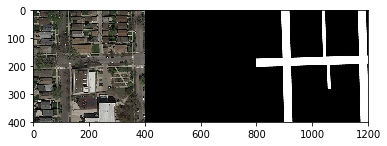

In [5]:
IDX = 1
X = imgs_to_windows(imgs,400,patch_size,input_size)
patches_idx = X[625*IDX:625*(IDX+1)]

Z_idx = model.predict(patches_idx)
labels_idx = (Z_idx[:,0] < Z_idx[:,1]) * 1 
predicted_image = label_to_img(400,400,16,16,labels_idx)
temp = concatenate_images(imgs_original[IDX],predicted_image)
plt.imshow(concatenate_images(temp, gt_imgs_not_padded[IDX]))

# predict on test

In [ ]:
#load images and pad them
test_images = np.asarray(pick_test_images())

test_images = padding_imgs(np.array(test_images),pad_rotate_size)

test_images_not_padded = np.asarray(pick_test_images())

In [ ]:
#prepare the input for the prediction
test_inputs = imgs_to_windows(test_images,608,patch_size,input_size)
print(test_inputs.shape)

In [ ]:
#recover the model
model, _,_ = create_model()
model.load_weights(NameWeights)

In [ ]:
#predict
test_prediction = model.predict(test_inputs)
print(test_prediction[0:3])

In [ ]:
test_predicted_labels = ((test_prediction[:,0] < test_prediction[:,1]) * 1 ).flatten()
test_labels = test_predicted_labels.reshape(50,-1)
print('Every row contains the labels of one image')
print(test_labels.shape)

In [ ]:
#check the prediction on the image IDX
IDX = 18
im = label_to_img(608, 608, 16, 16, test_labels[IDX])
plt.figure(figsize=[10,20])
plt.imshow(concatenate_images(test_images_not_padded[IDX], im))

In [ ]:
MY_masks_to_submission(SubmissionName, test_labels)

# Save the prediction

In [ ]:
import pickle
# Suppose that we create some patches
predicted_patches = test_predicted_labels
print('Predicted patches of size: ', predicted_patches.shape)


# Choose a name for the objects that we are going to save
name = 'prediction.pkl'

# Saving the objects:
with open(name, 'wb') as f:
    pickle.dump(predicted_patches, f)
print('Saved in ', name)

# Getting back the objects:
with open(name, 'rb') as f: 
    recovered_patches = pickle.load(f)
print('Recovered!')